In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d as conv2d
import time
import pandas as pd
import scipy.stats as stats
import imea

import seaborn as sns


In [2]:
L = 512
x = np.random.choice([1,0], size=((L,L)), replace=True, p=[0.5,0.5])

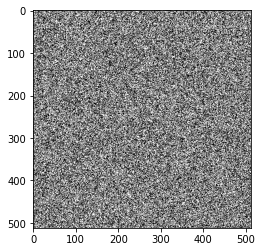

In [3]:
plt.imshow(x, cmap = 'gray')

In [4]:
L = 256
x = np.random.choice([1,0], size=((L,L)), replace=True, p=[0.5,0.5])

box =  [1,2,4,8,16, 32, 64, 128]

def countConv(x, k):
    stride =  k
    
    count  = 0
    
    for i in range(0, x.shape[0] - k + 1, k):
        for j in range(0, x.shape[1] -k + 1, k):
            
            
            X =  x[i:i+k, j:j+k]
            
            if np.sum(X.ravel()) != 0:
                count += 1
            

            
            
    return count
            
        

In [29]:
def fractDimGS(x):
    "geometric step method"
    
    size = x.shape[0]
    
    box =  [2 ** i for i in range(0, int(np.sqrt(size))) if 2**i <= size/2]
    
    count = []
    delta = []

    for k in box:
        count.append(countConv(x,k))
        delta.append(k)
    delta = list(reversed(delta))
    
    #sns.regplot(np.log(1/np.array(delta)), np.log(count), )

    slope = stats.linregress(np.log(1/np.array(delta)), np.log(count))[0]
    
    D =  1 - slope
    
    
    return D
    

    
    
    
    
    

In [8]:
from imea.measure_2d.micro import  fractal_dimension_boxcounting as fract_dim


In [18]:
fract_dim(x)

2.8171705067564963

In [30]:
fractDimGS(x)

2.9101447042860604